## Dependencies

In [1]:
import pandas as pd
import re
from stop_words import stop_words
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize



# Helper Functions


### To Lowercase

In [2]:
def lower_case(line): return line.lower().strip()


In [8]:
#build truncated data set for testing
full_data = pd.read_csv('rotten_tomatoes_reviews.csv')
truncated_data = full_data.head(5000)
truncated_data.to_csv('truncated.csv', index=False)

### Stem Words

In [3]:
def stem_words(line):
    ps = PorterStemmer()

    words = line.split()
    
    return_list = [ps.stem(word.strip()) for word in words]

    return ' '.join(return_list)


### Remove Stop Words

In [4]:
def remove_stop_words(line):

    words = line.split()
    
    kept_words = [word for word in words if word not in stop_words]

    return ' '.join(kept_words)


### Remove Special Characters and Numbers

In [5]:
def remove_special_characters_and_numbers(line):
    return re.sub(r'([^a-zA-Z\s]+?)', '', line)




### Vectorize

In [6]:
def get_words_set(df): return {word for index, row in df.iterrows() for word in row['Review'].split()}    


def create_row_dict(index, row, word_set):
    
    if index % 10000 == 0:
        print('processing index ', index, '.')
    
    row_words = set(row['Review'].split())
    
    return_dict = {header: (0, 1)[header in row_words] for header in word_set}
    return_dict['_Freshness'] = row['Freshness']
    return return_dict


def vectorize(df):
    word_set = get_words_set(df)
    
    word_set.add('_Freshness') #added a special character just in case 'Freshness' shows up in the data

    
    print('word_set size: ', len(word_set))
        
    dict_list = [create_row_dict(index, row, word_set) for index, row in df.iterrows()]

    return_df = pd.DataFrame(dict_list)

    print(return_df.head())
    return return_df



# Main
### Clean

In [9]:

import time
start = time.clock()
def get_time():
    print('TIME: ', time.clock() - start)

def clean_data(df):
    df['Review'] = df['Review'].apply(lower_case)
    print('Finished, lower_case: ')
    get_time()
    df['Review'] = df['Review'].apply(remove_stop_words)
    print('Finished, remove_stop_words: ')
    get_time()
    df['Review'] = df['Review'].apply(remove_special_characters_and_numbers)
    print('Finished, remove_special_characters_and_numbers: ')
    get_time()
    df['Review'] = df['Review'].apply(stem_words)
    print('Finished, stem_words: ')
    get_time()

    df.to_csv('cleaned.csv', index=False)
    print('Finished, cleaned to csv: ')
    get_time()
    
raw_df = pd.read_csv('truncated.csv')
# raw_df = pd.read_csv('rotten_tomatoes_reviews.csv')

clean_data(raw_df)


C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


Finished, lower_case: 
TIME:  0.016088199999956032
Finished, remove_stop_words: 
TIME:  0.16240319999997155
Finished, remove_special_characters_and_numbers: 
TIME:  0.1807886999999937
Finished, stem_words: 
TIME:  1.2042765999999574
Finished, cleaned to csv: 
TIME:  1.2215138999999908


### Vectorize

In [10]:

clean_data = pd.read_csv('cleaned.csv')
vectorized = vectorize(clean_data)
print('Finished, vectorize: ')
get_time()
vectorized.to_csv('vectorized.csv', index=False)
print('Finished! ')
get_time()


word_set size:  11290
processing index  0 .
   angst  suppress  horrend  heineken  eavesdrop  nab  chin  center  desol  \
0      0         0        0         0          0    0     0       0      0   
1      0         0        0         0          0    0     0       0      0   
2      0         0        0         0          0    0     0       0      0   
3      0         0        0         0          0    0     0       0      0   
4      0         0        0         0          0    0     0       0      0   

   carel  ...  youtub  matt  disconcertingli  order  indic  middlebrow  \
0      0  ...       0     0                0      0      0           0   
1      0  ...       0     0                0      0      0           0   
2      0  ...       0     0                0      0      0           0   
3      0  ...       0     0                0      0      0           0   
4      0  ...       0     0                0      0      0           0   

   softporn  xavier  enron  jian  
0      

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


Finished! 
TIME:  103.80136779999998


In [ ]:
! pip install --user nltk textblob
! python -m nltk.downloader stopwords
! python -m textblob.download_corpora

## Historgram review of the polarity of the Rotten Tomatoes Reviews recieved

In [28]:
from IPython.display import Image                   # image display
from ipywidgets import widgets, interactive, Layout # interactive visualization 
import matplotlib.pyplot as plt                     # visualization

from collections import Counter              # word counting
import nltk                                  # text processing
from textblob import TextBlob                # sentiment analysis and language detection and translation 

# inline display of plots
%matplotlib inline

In [35]:
! pip install wordcloud

In [36]:
from wordcloud import WordCloud

Using the NLTK and Texblob libraries, we added a polarity column to our clean data dataframe.  From this we created a histogram to give a visual sturcture to the polarity of the loaded review data.

In [24]:
clean_data["polarity"] =  clean_data.Review.apply(lambda x: TextBlob(x).sentiment.polarity)*100

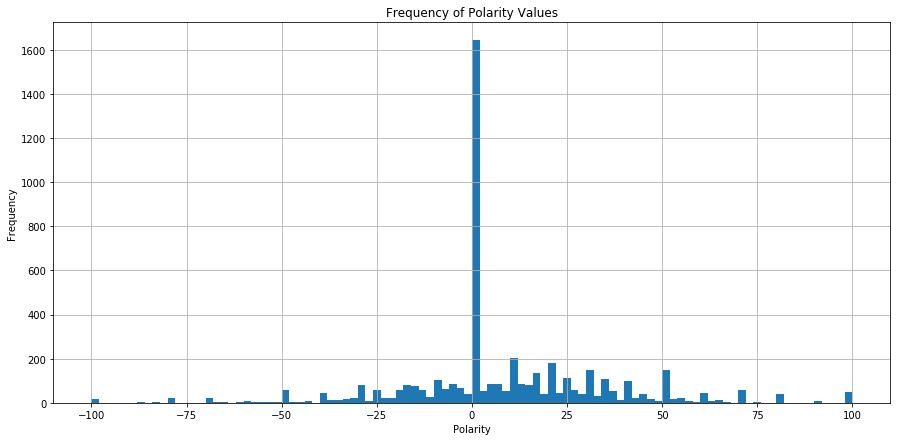

In [33]:
clean_data.polarity.plot(kind="hist", bins=100, grid=True, figsize=(15,7))
plt.title('Frequency of Polarity Values')
plt.xlabel('Polarity')
plt.show()

## Word Cloud Representation of the reviews

We also wanted to look at the types of words we were seeing in the reviews to help trim our stop list down to give more meaningful results.  To get a visual of this, we implemented a word cloud visualization:

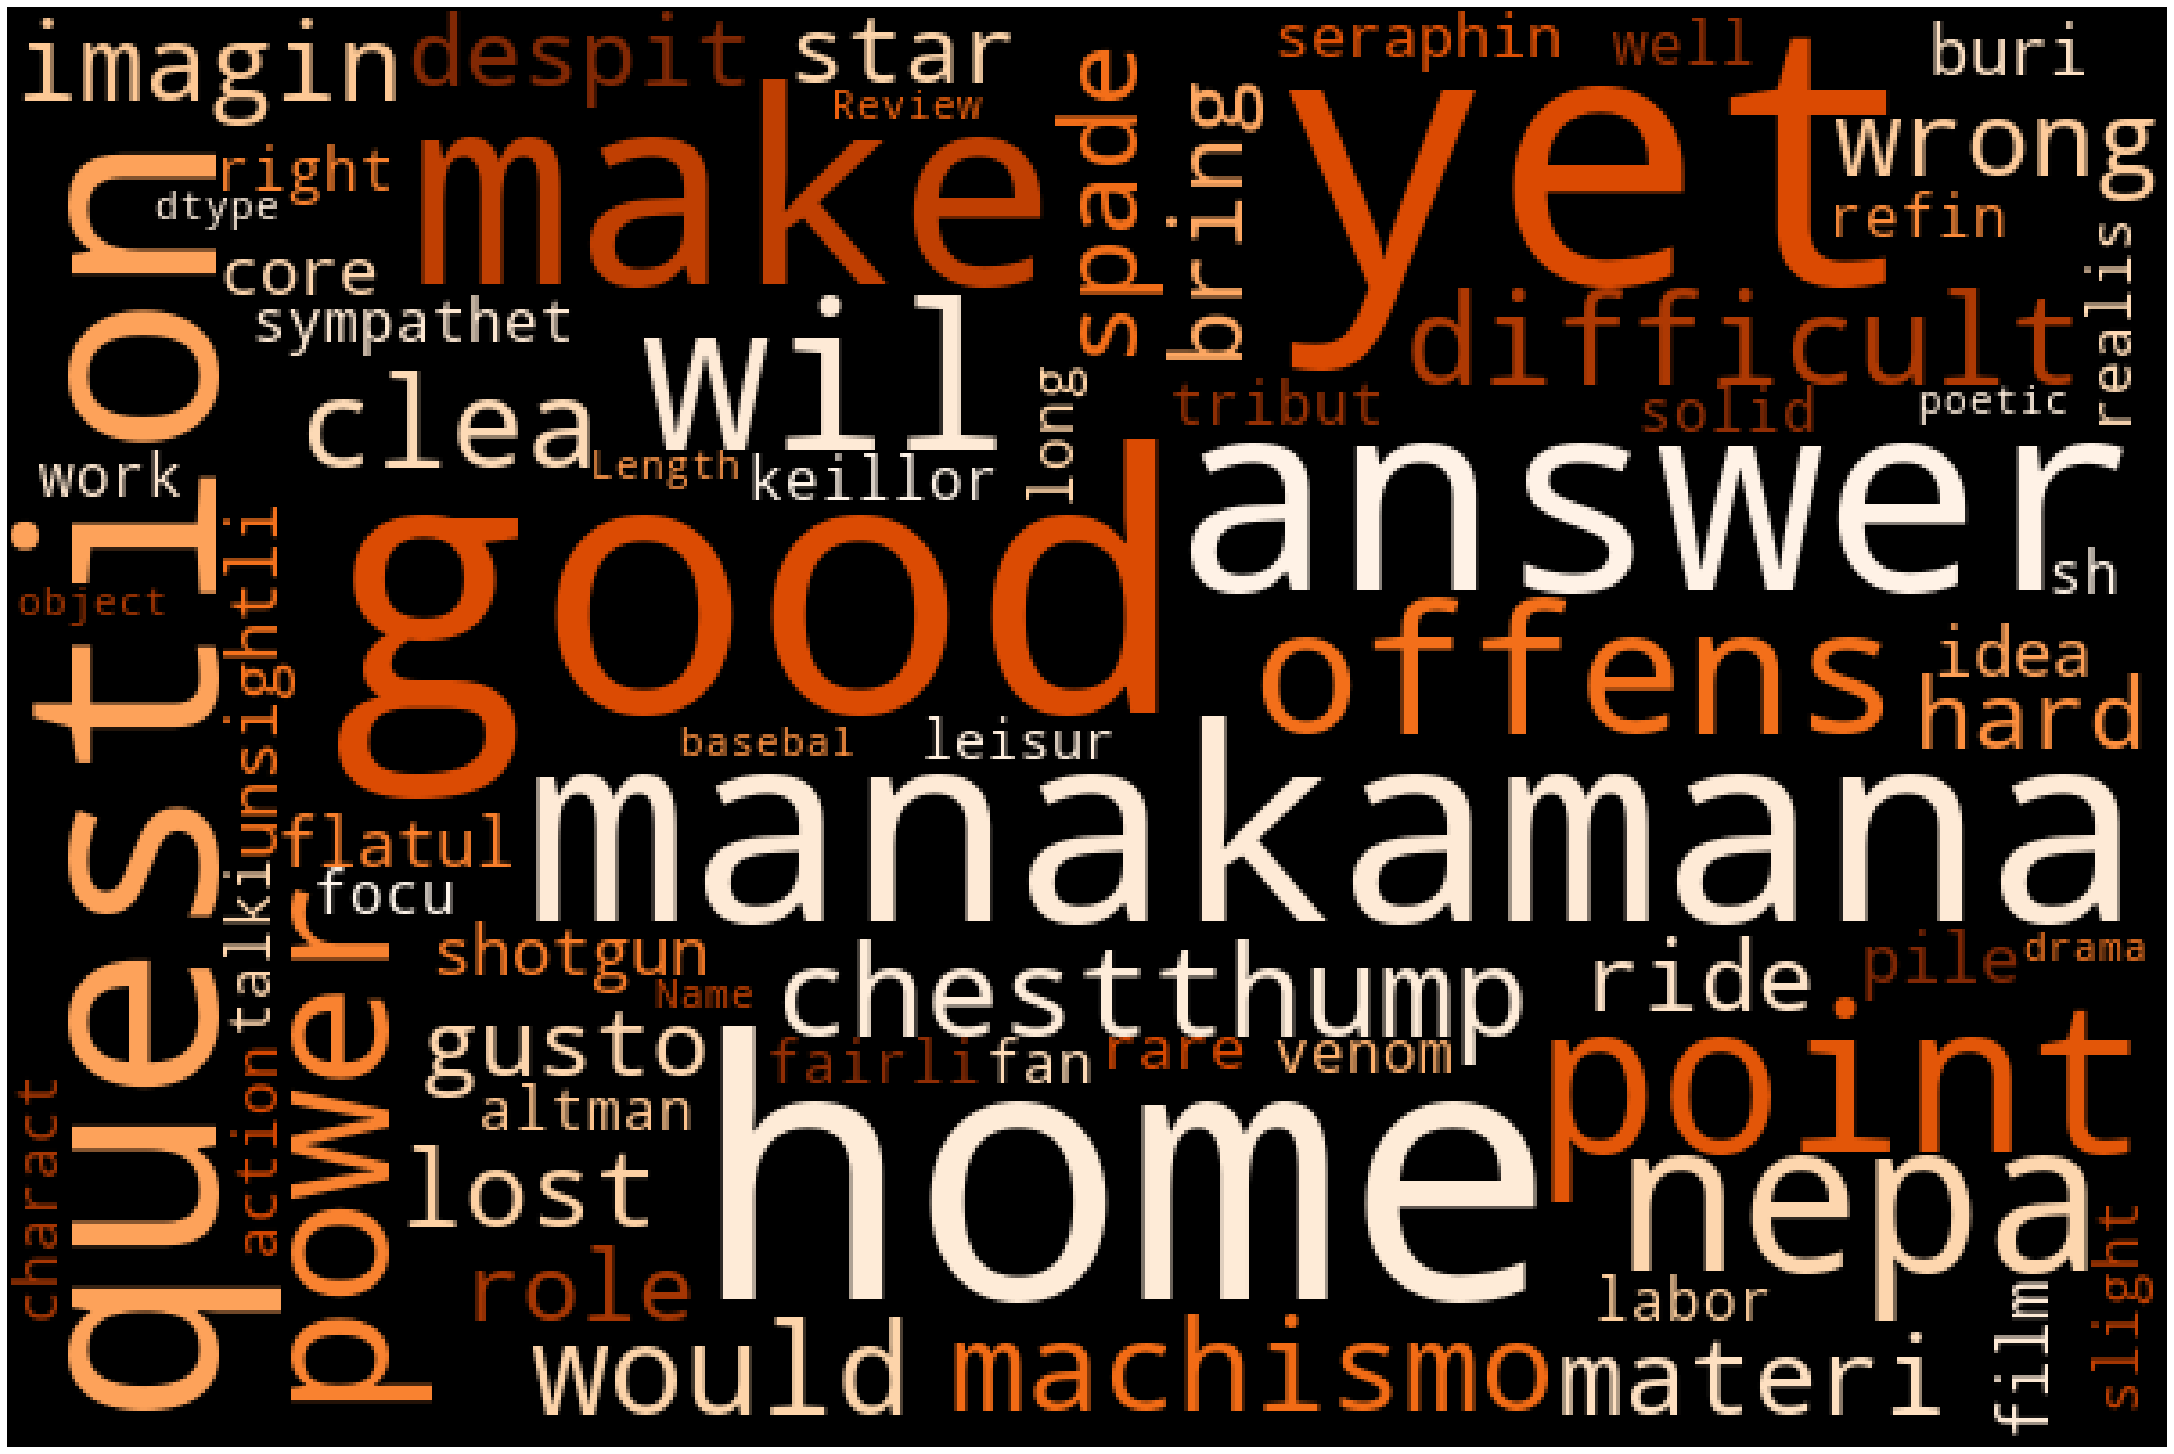

In [38]:
img = WordCloud(width = 600, height = 400,
                          background_color='black', colormap = 'Oranges',
                          stopwords=stop_words,
                          max_words=200,
                          max_font_size=100,
                          random_state=42
                         ).generate(str(clean_data["Review"]))

plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(img)
plt.axis('off')
plt.show()